[View in Colaboratory](https://colab.research.google.com/github/fabiansd/AI-workshop/blob/master/AI_workshop_melbourne.ipynb)

# Datasett




Beskrivelse av datasett:

https://www.kaggle.com/c/home-data-for-ml-course/data


Alle måleenhetene utgjør hver sin kolonne, og kalles *features*


# Bibliotek dokumentasjon

Pandas (datahåndtering):
https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.html

Seaborn (plottefunksjoner):
https://seaborn.pydata.org/index.html

Matplotlib (plottestøttefunksjoner)
https://matplotlib.org/api/_as_gen/matplotlib.figure.Figure.html#matplotlib.figure.Figure

Scikit-learn (maskinlæring):
http://scikit-learn.org/stable/


Bruk google hyppig, se på eksempler.!

# Importering av data og python-bibliotek

In [0]:
from six.moves import urllib
import pandas as pd

urllib.request.urlretrieve("https://raw.githubusercontent.com/fabiansd/AI-workshop/master/data/Melbourne_train.csv", "./Melbourne_train.csv")

import sklearn
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

pd.options.mode.chained_assignment = None  # default='warn'

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Databehandling


Første steg i et AI-prosjekt er å undersøke og studere dataen. Pandas har flere funksjoner som kan hjelpe til med dette. Det er viktig få et innblikk i hvordan dataen ser ut og hva slag verdier den faktisk inneholder.


## Utforsking av data

Dataen blir lest og lastet opp av pandas biblioteket. Pandas kan anses som excel for python

In [0]:
data = pd.read_csv('Melbourne_train.csv')

For å skrive ut de 10 førset elementene i datasettet

In [4]:
data.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


De fem siste elementene

In [5]:
data.tail(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1459,1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


Med pandas kan man få en statistisk oversikt over datasettet, for eksempel kan vi se hva gjennomsnittlig salgspris for boliger er. Merk at oversiktet er kun over numeriske features.

In [6]:
data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


Pandas kan også gi info om hva slags data som er lagret i datasettet, og hvor mange instanser det er i hver kolonne.

In [7]:
data.info()
print('\n Lengde på data: {}'.format(len(data)))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

Alle kolonnenavn kan også skrives rett ut

In [8]:
print(data.columns)

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

Som vi kan se over er det ikke like mange verdier i de ulike måleverdiene, det vi kaller features. Det er ikke uvanlig at det mangler verdier i datasettet. Vi kan sjekke hvilke features som mangler en eller flere verdier med pandas.

In [9]:
print(data.isnull().any())

Id               False
MSSubClass       False
MSZoning         False
LotFrontage       True
LotArea          False
Street           False
Alley             True
LotShape         False
LandContour      False
Utilities        False
LotConfig        False
LandSlope        False
Neighborhood     False
Condition1       False
Condition2       False
BldgType         False
HouseStyle       False
OverallQual      False
OverallCond      False
YearBuilt        False
YearRemodAdd     False
RoofStyle        False
RoofMatl         False
Exterior1st      False
Exterior2nd      False
MasVnrType        True
MasVnrArea        True
ExterQual        False
ExterCond        False
Foundation       False
                 ...  
BedroomAbvGr     False
KitchenAbvGr     False
KitchenQual      False
TotRmsAbvGrd     False
Functional       False
Fireplaces       False
FireplaceQu       True
GarageType        True
GarageYrBlt       True
GarageFinish      True
GarageCars       False
GarageArea       False
GarageQual 

![alt text](https://)En vanlig måte å håndtere manglende verdier på er å fjerne hele raden om den mangler en eller flere verdier. I vårt tilfelle vil det fjerne nesten hele datasettet, siden featuren med mest manglende verdier inneholder kun 7 verdier, kvalitet på badebasseng. Vi kan simpelthen ikke gjette på dette, så det beste vil være å ekskludere denne featuren helt.

Pandas lar deg hente ut spesifikke kolonner, noe som gjør det mulig å trekke ut dataen du ønsker og ekskludere data av dårlig kvalitet

In [10]:

data_ÅrSolgt = data['YrSold']
data_ÅrSolgt.head(10)

0    2008
1    2007
2    2008
3    2006
4    2008
5    2009
6    2007
7    2009
8    2008
9    2008
Name: YrSold, dtype: int64

man kan også filtrere ut spesifikk data, som for eksempel alle boliger solgt i 2008

In [11]:
data_Solgt2008 = data[data['YrSold'] == 2008]
data_Solgt2008.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000
10,11,20,RL,70.0,11200,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,129500
12,13,20,RL,NaN,12968,Pave,NaN,IR2,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,144000
14,15,20,RL,NaN,10920,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,GdWo,NaN,0,5,2008,WD,Normal,157000
18,19,20,RL,66.0,13695,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,159000
22,23,20,RL,75.0,9742,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,230000


Enkelte verdier kan hentes ut med tall-indeksering ved bruk av iloc-funksjonen

In [12]:
verdi = data.iloc[0,3]
feature = data.columns[3]

print(feature, verdi)

LotFrontage 65.0


**Man** kan lage nye subdatasett av det originale datasettet ved å hente ut ønskede kolonner med data. Dette lar deg konstruere helt nye datasett.

In [13]:
kolonner_salgsinfo = ['MoSold','YrSold','SalePrice']
data_salgsinfo = data[kolonner_salgsinfo]
data_salgsinfo.head(10)

,MoSold,YrSold,SalePrice
0,2,2008,208500
1,5,2007,181500
2,9,2008,223500
3,2,2006,140000
4,12,2008,250000
5,10,2009,143000
6,8,2007,307000
7,11,2009,200000
8,4,2008,129900
9,1,2008,118000


Det samme kan oppnås ved å bruke tall-indeksering, iloc lar oss velge ut [rad, kolonne]

In [14]:
data_4_første = data.iloc[:,0:4]
data_4_første.head(5)

,Id,MSSubClass,MSZoning,LotFrontage
0,1,60,RL,65.0
1,2,20,RL,80.0
2,3,60,RL,68.0
3,4,70,RL,60.0
4,5,60,RL,84.0


Nye features kan konstrueres ved å lage kombinasjoner av kolonner i datasettet. Siden kolonnen 'HouseAge' ikke finnes i datasettet vil det blir oprettet som en ny kolonne

In [15]:
data_salgsinfo['HouseAge'] = data['YrSold'] - data['YearBuilt']
data_salgsinfo.head(5)

,MoSold,YrSold,SalePrice,HouseAge
0,2,2008,208500,5
1,5,2007,181500,31
2,9,2008,223500,7
3,2,2006,140000,91
4,12,2008,250000,8


Vi kan nå enkelt finne gjennomsnittlig husalder ved å bruke pandas describe() funksjon

In [16]:
data_salgsinfo.describe()

,MoSold,YrSold,SalePrice,HouseAge
count,1460.000000,1460.000000,1460.000000,1460.000000
mean,6.321918,2007.815753,180921.195890,36.547945
std,2.703626,1.328095,79442.502883,30.250152
min,1.000000,2006.000000,34900.000000,0.000000
25%,5.000000,2007.000000,129975.000000,8.000000
50%,6.000000,2008.000000,163000.000000,35.000000
75%,8.000000,2009.000000,214000.000000,54.000000
max,12.000000,2010.000000,755000.000000,136.000000


Man kan også få en oversikt over hva kategoriske features inneholder, som for eksempel street address, for å hjelpe deg med å bli kjent med hva dataen inneholder.

In [17]:
data["Neighborhood"].value_counts()

NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
StoneBr     25
SWISU       25
MeadowV     17
Blmngtn     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: Neighborhood, dtype: int64

![alt text](https://)Denne kategoriske featuren viser at boligene er fordelt over mange nabolag. Dette er en god feature fordi den tilfører nyttig informasjon til datasettet. Om vi ser på featuren 'Utilities' derimot, så ser vi at det er et eneste tilfelle av kategorien NoSeWa, resten tilhører den andre kategorien. Dette vil være en feature som ikke tilfører noe informasjon, men opptar plass og øker kompleksiteten på datasettet unædvendig.

In [18]:
data['HouseStyle'].value_counts()

1Story    726
2Story    445
1.5Fin    154
SLvl       65
SFoyer     37
1.5Unf     14
2.5Unf     11
2.5Fin      8
Name: HouseStyle, dtype: int64

#Visualisering av data

Visualisering er en viktig del av den initielle utforskingen av dataen. Det viser ofte informasjon som er vanskelig å få ved å kun se på dataen i rå form.

Bibliotekene vi bruker her er Matplotlib og Seaborn (plt og sns)

## Fordeling av data

Et histogram viser fordelinen av data i "bøtter", altså intervaller med data. Dette er velegnet for å studere fordeling av talldata. For eksempel kan vi visualisere fordelingen av salgsprisen fordelt over et valgfritt antall bøtter.

Text(0.5,1,'Fordeling av slagspris')

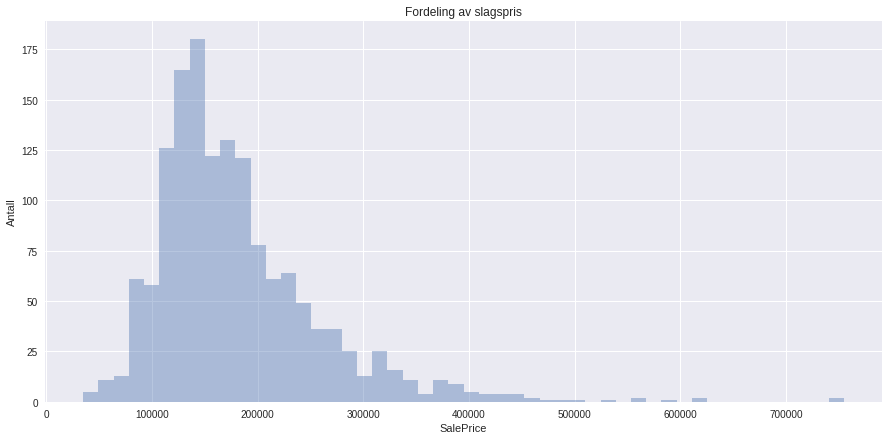

In [19]:
#Lab figur-objekt og bestem størrelsen
plt.figure(figsize=(15,7))

#Velg type plot med sns (seaborn) biblioteket
sns.distplot(data['SalePrice'],bins=50, kde=False);

#X- og y-aksen kan navngis
plt.ylabel('Antall')

#Sett tittel på figur
plt.title('Fordeling av slagspris')

Fordelingen kan også visualiseres med en tilpasset funksjon (kde)

Text(0.5,1,'Fordeling av slagspris')

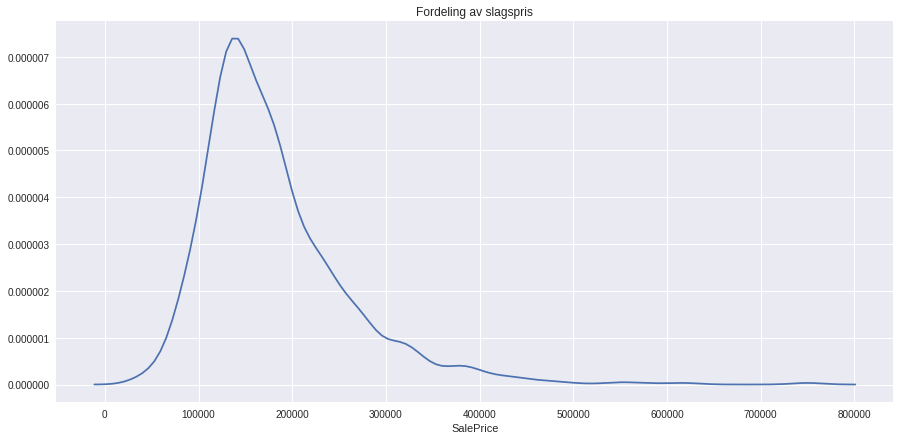

In [20]:
plt.figure(figsize=(15,7))
sns.distplot(data['SalePrice'],hist=False, kde=True);
plt.title('Fordeling av slagspris')

Kategorisk data kan vi visualisere ved å bruke countplots. For eksempel kan vi få en oversikt over hvor mange salg som ble gjort i de ulike årene.

Text(0.5,1,'Salg per år')

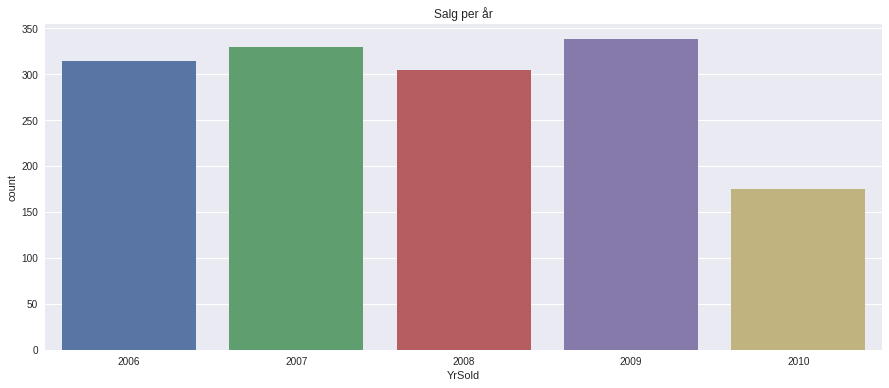

In [21]:
plt.figure(figsize=(15, 6))
sns.countplot(x='YrSold', data=data)
plt.title('Salg per år')

Man kan også gruppere inn countplots etter kategori, for eksempel kan vi fordele plottet over inn i måneder også

Text(0.5,1,'Salg per år fordelt over måneder')

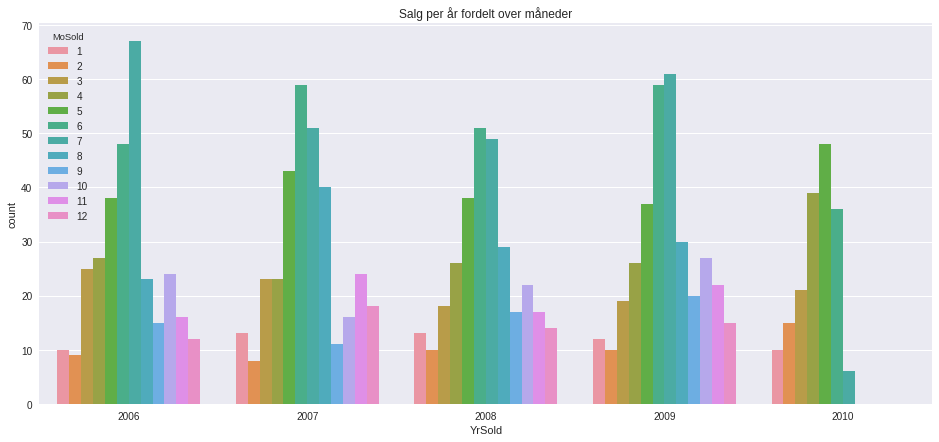

In [22]:
plt.figure(figsize=(16, 7))
sns.countplot(x='YrSold', hue='MoSold', data=data)
plt.title('Salg per år fordelt over måneder')

Text(0.5,1,'Oversik over nabolag')

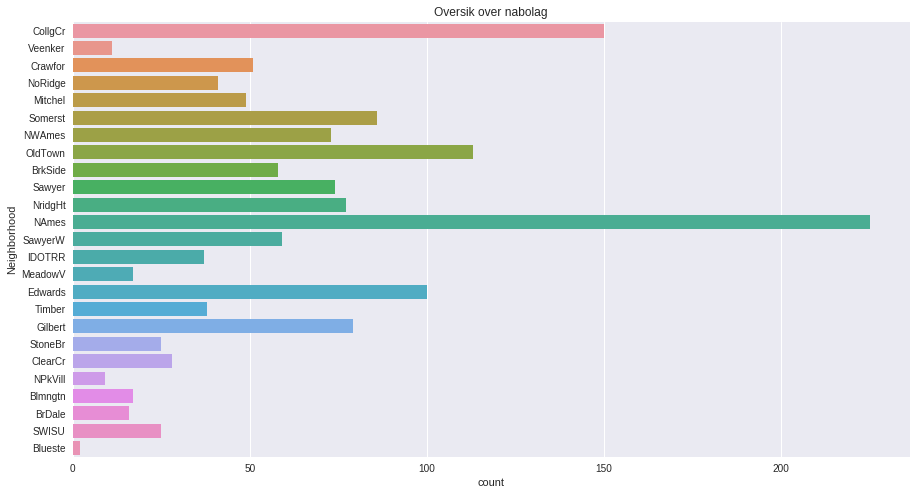

In [23]:
plt.figure(figsize=(15, 8))
sns.countplot(y='Neighborhood', data=data)
plt.title('Oversik over nabolag')

##Korrelasjon

For å få et bredt perspektiv av hvilken effekt featurene har på hverandre er det nyttig å se på korrelasjonen mellom dem. Korrelasjonsplottet under ser vi at det er perfekt korrelasjon langs diagonalen, noe som er naturlig siden alle variabler korrelerer perfekt med seg selv. Vi kan for eksempel se at karakternivået et år korrelerer sterkt med karakternivået de andre årene. En elev gjør det typisk bra eller dårlig alle årene. En annen observajon er at utdanningen til foreldrene korreleres også sterkt, altså vil foreldre par typisk ha samme utdanningsnivå.

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5, 20.5, 21.5,
        22.5, 23.5, 24.5, 25.5, 26.5, 27.5, 28.5, 29.5, 30.5, 31.5, 32.5,
        33.5, 34.5, 35.5, 36.5, 37.5]), <a list of 38 Text yticklabel objects>)

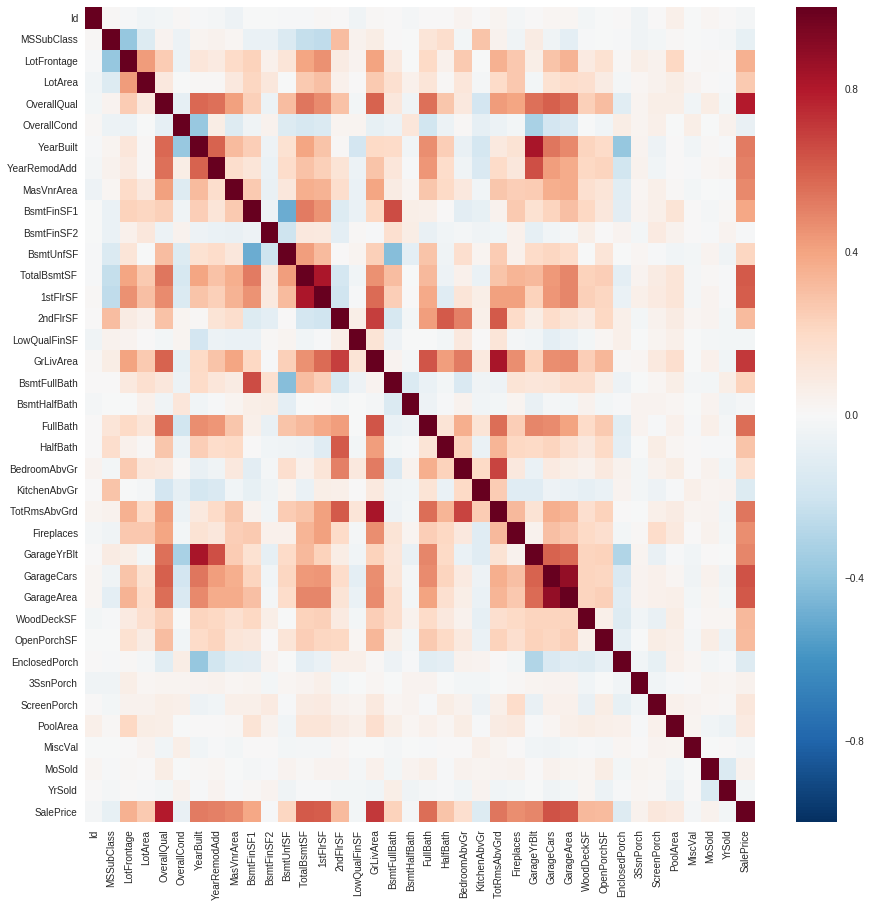

In [24]:
plt.figure(figsize=(15,15))
sns.heatmap(data.corr(),annot = False, cbar = True)
plt.xticks(rotation=90)
plt.yticks(rotation = 0)

## Oppgave: studer og visualiser data


Finn følgende informasjon: 

 - Første og siste salg (måned og år)
 
 - Største svømmebasseng
  
 - Gjennomsnittlig husalder 


Visualiser følgende:

 - Fordeling av kvadratfot på alle tomter

 - Fordeling over når boligene ble bygget

 - Hvor mange salg det er i hver måned totalt

 - Korrelasjonsplot for datasettet dere lagde i forrige seksjon (bruk datasettet til løsningsforslaget eventuelt)

Lag gjerne andre visualiseringer dere syntes virker interessante.

In [25]:
"Skriv kode her"

'Skriv kode her'

## Oppgave: lag nytt datasett

Lag et nytt datasett og velg ut features dere tenker er nyttige. Studer dataen ved bruk av alt vi har gått gjennom, tenk at det er fordel å ha så lite unødvendig data i datasettet som mulig. Se også på korrelasjonsplottet for å avdekke hvilke features som korrelerer med output, salgspris. Når en variabel korrelerer med output betyr det at den har en grad av påvirkning. Lag nytt korrelasjonsplot for det nye datasettet.

In [0]:
#Skriv kode her

## Løsningsforslag: studer og visualiser data

Text(0.5,1,'Fordeling av kvadratfot på tomt')

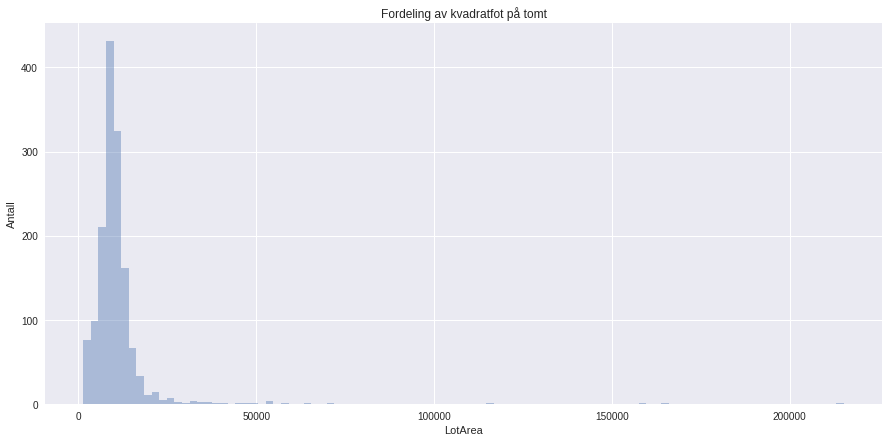

In [28]:
plt.figure(figsize=(15,7))
sns.distplot(data['LotArea'],bins=100, kde=False);
plt.ylabel('Antall')
plt.title('Fordeling av kvadratfot på tomt')

Text(0.5,1,'Salg per år fordelt over måneder')

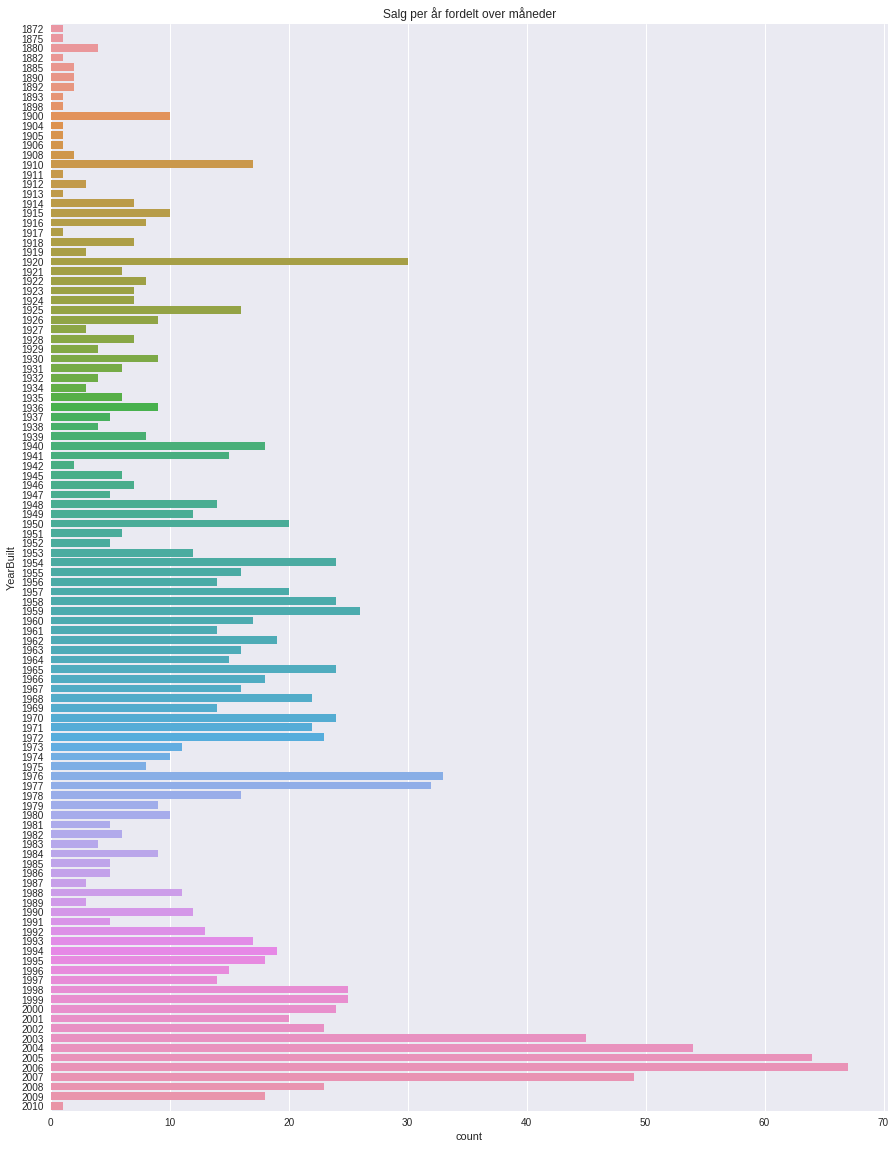

In [29]:
plt.figure(figsize=(15, 20))
sns.countplot(y='YearBuilt', data=data)
plt.title('Fordeling av år boligene ble bygget')

Text(0.5,1,'Salg per måned')

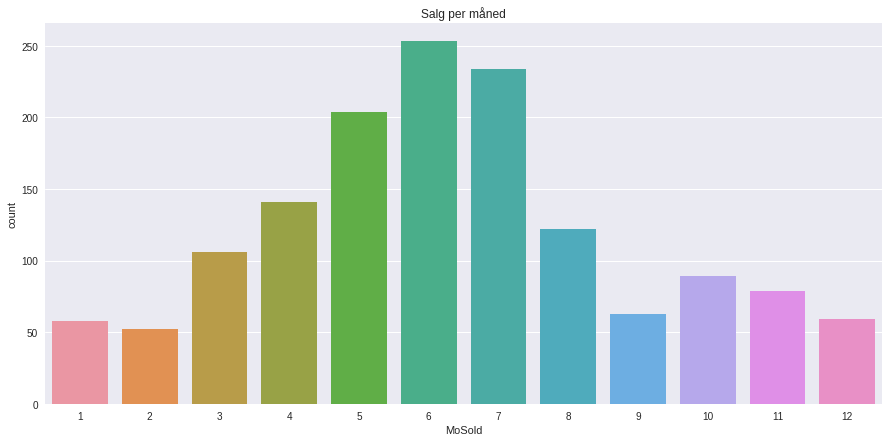

In [31]:
plt.figure(figsize=(15,7))
sns.countplot(data['MoSold'])
plt.title('Salg per måned')

##Løsningsforslag: konstruer datasett

In [33]:
#aktuelle_kolonner = ['LotArea','Neighborhood','WoodDeckSF','Condition1','HouseStyle','OverallQual','OverallCond','YearBuilt','YearRemodAdd','ExterQual','Foundation','Heating','HeatingQC','1stFlrSF','1stFlrSF','FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd','GarageCars','Fireplaces','PoolArea','MoSold','YrSold']
aktuelle_kolonner = ['LotArea','Neighborhood','WoodDeckSF','Condition1','HouseStyle','OverallQual','OverallCond','YearBuilt','YearRemodAdd','1stFlrSF','1stFlrSF','FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd','GarageCars','Fireplaces','PoolArea','MoSold','YrSold']
data_modell = data[aktuelle_kolonner]
data_modell['HouseAge'] = data['YrSold'] - data['YearBuilt']
data_modell['SalePrice'] = data['SalePrice']
data_modell.head(5)

,LotArea,Neighborhood,WoodDeckSF,Condition1,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,1stFlrSF,...,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,GarageCars,Fireplaces,PoolArea,MoSold,YrSold,HouseAge,SalePrice
0,8450,CollgCr,0,Norm,2Story,7,5,2003,2003,856,...,3,1,8,2,0,0,2,2008,5,208500
1,9600,Veenker,298,Feedr,1Story,6,8,1976,1976,1262,...,3,1,6,2,1,0,5,2007,31,181500
2,11250,CollgCr,0,Norm,2Story,7,5,2001,2002,920,...,3,1,6,2,1,0,9,2008,7,223500
3,9550,Crawfor,0,Norm,2Story,7,5,1915,1970,961,...,3,1,7,3,1,0,2,2006,91,140000
4,14260,NoRidge,192,Norm,2Story,8,5,2000,2000,1145,...,4,1,9,3,1,0,12,2008,8,250000


In [34]:
data_modell.describe()

,LotArea,WoodDeckSF,OverallQual,OverallCond,YearBuilt,YearRemodAdd,1stFlrSF,1stFlrSF,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,GarageCars,Fireplaces,PoolArea,MoSold,YrSold,HouseAge,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,10516.828082,94.244521,6.099315,5.575342,1971.267808,1984.865753,1162.626712,1162.626712,1.565068,0.382877,2.866438,1.046575,6.517808,1.767123,0.613014,2.758904,6.321918,2007.815753,36.547945,180921.195890
std,9981.264932,125.338794,1.382997,1.112799,30.202904,20.645407,386.587738,386.587738,0.550916,0.502885,0.815778,0.220338,1.625393,0.747315,0.644666,40.177307,2.703626,1.328095,30.250152,79442.502883
min,1300.000000,0.000000,1.000000,1.000000,1872.000000,1950.000000,334.000000,334.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,0.000000,34900.000000
25%,7553.500000,0.000000,5.000000,5.000000,1954.000000,1967.000000,882.000000,882.000000,1.000000,0.000000,2.000000,1.000000,5.000000,1.000000,0.000000,0.000000,5.000000,2007.000000,8.000000,129975.000000
50%,9478.500000,0.000000,6.000000,5.000000,1973.000000,1994.000000,1087.000000,1087.000000,2.000000,0.000000,3.000000,1.000000,6.000000,2.000000,1.000000,0.000000,6.000000,2008.000000,35.000000,163000.000000
75%,11601.500000,168.000000,7.000000,6.000000,2000.000000,2004.000000,1391.250000,1391.250000,2.000000,1.000000,3.000000,1.000000,7.000000,2.000000,1.000000,0.000000,8.000000,2009.000000,54.000000,214000.000000
max,215245.000000,857.000000,10.000000,9.000000,2010.000000,2010.000000,4692.000000,4692.000000,3.000000,2.000000,8.000000,3.000000,14.000000,4.000000,3.000000,738.000000,12.000000,2010.000000,136.000000,755000.000000


In [35]:
data_modell.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 23 columns):
LotArea         1460 non-null int64
Neighborhood    1460 non-null object
WoodDeckSF      1460 non-null int64
Condition1      1460 non-null object
HouseStyle      1460 non-null object
OverallQual     1460 non-null int64
OverallCond     1460 non-null int64
YearBuilt       1460 non-null int64
YearRemodAdd    1460 non-null int64
1stFlrSF        1460 non-null int64
1stFlrSF        1460 non-null int64
FullBath        1460 non-null int64
HalfBath        1460 non-null int64
BedroomAbvGr    1460 non-null int64
KitchenAbvGr    1460 non-null int64
TotRmsAbvGrd    1460 non-null int64
GarageCars      1460 non-null int64
Fireplaces      1460 non-null int64
PoolArea        1460 non-null int64
MoSold          1460 non-null int64
YrSold          1460 non-null int64
HouseAge        1460 non-null int64
SalePrice       1460 non-null int64
dtypes: int64(20), object(3)
memory usage: 262.4+ KB


(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5]),
 <a list of 20 Text yticklabel objects>)

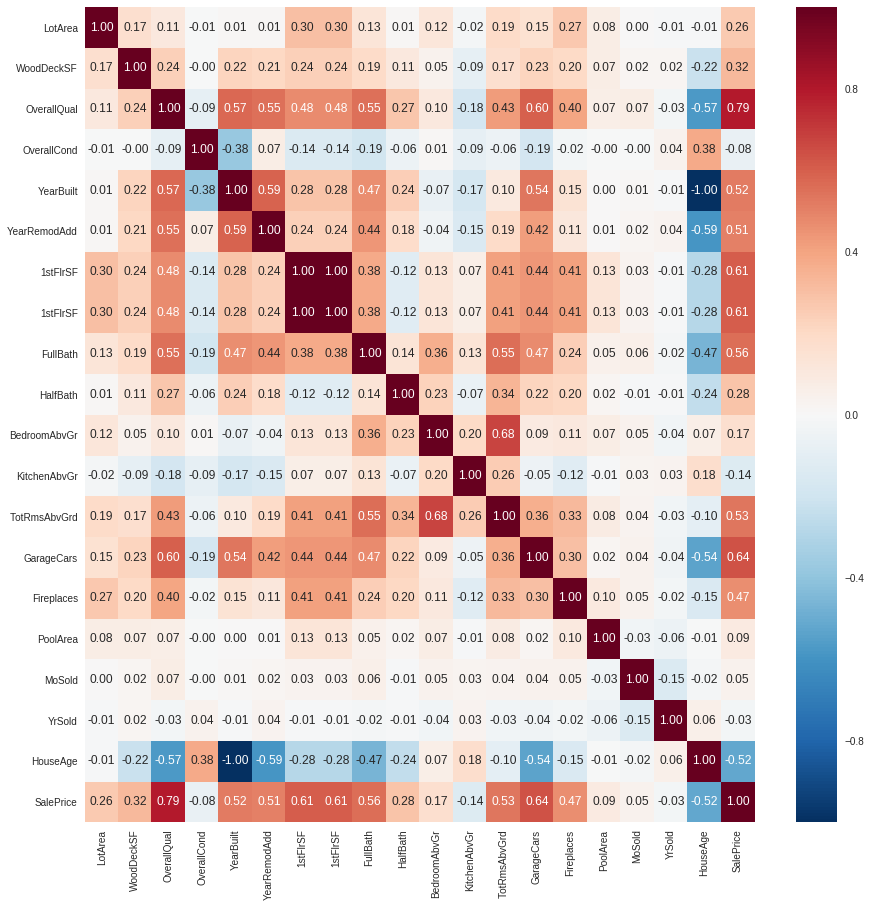

In [36]:
plt.figure(figsize=(15,15))
sns.heatmap(data_modell.corr(),annot = True,fmt = ".2f",cbar = True)
plt.xticks(rotation=90)
plt.yticks(rotation = 0)

#Maskinlærings modeller

Til maskinlæringsmodellene vil vi benytte datasettet fra løsningsforslaget i første seksjon. Vi ønsker her å predikere salgsprisen basert på all informasjonen som er tilgjengelig på boligen. Altså vil input til modellen være utvalgte features, og outputen vil være salgspris.

In [37]:
#Velg alle kolonner untatt den siste
input_data = data_modell.iloc[:,0:-1]

#Velg kun siste kolonne
output_data = data_modell['SalePrice']

print('Datastørrelse på features: {}, datastørrelse på priser: {}'.format(input_data.shape,output_data.shape))

Datastørrelse på features: (1460, 22), datastørrelse på priser: (1460,)


In [38]:
data_modell.head(5)

,LotArea,Neighborhood,WoodDeckSF,Condition1,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,1stFlrSF,...,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,GarageCars,Fireplaces,PoolArea,MoSold,YrSold,HouseAge,SalePrice
0,8450,CollgCr,0,Norm,2Story,7,5,2003,2003,856,...,3,1,8,2,0,0,2,2008,5,208500
1,9600,Veenker,298,Feedr,1Story,6,8,1976,1976,1262,...,3,1,6,2,1,0,5,2007,31,181500
2,11250,CollgCr,0,Norm,2Story,7,5,2001,2002,920,...,3,1,6,2,1,0,9,2008,7,223500
3,9550,Crawfor,0,Norm,2Story,7,5,1915,1970,961,...,3,1,7,3,1,0,2,2006,91,140000
4,14260,NoRidge,192,Norm,2Story,8,5,2000,2000,1145,...,4,1,9,3,1,0,12,2008,8,250000


Maskinlæringsmodellene ser kun tallverdier, det er derfor ikke mulig å servere den kategoriske verdier som "Neighborhood". Vi må derfor konvertere all kategorisk input til tallverdier.

In [39]:
data["Street"].value_counts()

Pave    1454
Grvl       6
Name: Street, dtype: int64

Denne kategorien kan oversettes til [0 , 1] istedenfor ['Pvae' , 'Grvl'] slik at den blir lesbar for modellene våre. Dette må gjøres med alle kategoriske verdier. Scikit-learn har funksjoner som gjør dette enkelt.

In [41]:
from sklearn import preprocessing

Neighborhood = preprocessing.LabelEncoder()
Condition1 = preprocessing.LabelEncoder()
HouseStyle = preprocessing.LabelEncoder()

input_data['Neighborhood'] = Neighborhood.fit_transform(input_data['Neighborhood'])
input_data['Condition1'] = Condition1.fit_transform(input_data['Condition1'])
input_data['HouseStyle'] = HouseStyle.fit_transform(input_data['HouseStyle'])

input_data.head(5)

,LotArea,Neighborhood,WoodDeckSF,Condition1,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,1stFlrSF,...,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,GarageCars,Fireplaces,PoolArea,MoSold,YrSold,HouseAge
0,8450,5,0,2,5,7,5,2003,2003,856,...,1,3,1,8,2,0,0,2,2008,5
1,9600,24,298,1,2,6,8,1976,1976,1262,...,0,3,1,6,2,1,0,5,2007,31
2,11250,5,0,2,5,7,5,2001,2002,920,...,1,3,1,6,2,1,0,9,2008,7
3,9550,6,0,2,5,7,5,1915,1970,961,...,0,3,1,7,3,1,0,2,2006,91
4,14260,15,192,2,5,8,5,2000,2000,1145,...,1,4,1,9,3,1,0,12,2008,8


In [117]:
#Dataen deles opp i to sett: treningssett og testsett. Test_size bestemmer andelen av dataen som blir brukt til testing av modellen
from sklearn.model_selection import train_test_split

input_treningsdata, input_testdata, output_treningsdata, output_testdata = train_test_split(input_data, output_data, test_size=0.2, random_state=1)

print('Input_treningsdata: {}, input_testdata: {}, output_treningsdata: {} og output_testdata: {}'.format(input_treningsdata.shape, input_testdata.shape, output_treningsdata.shape, output_testdata.shape))


Input_treningsdata: (1168, 22), input_testdata: (292, 22), output_treningsdata: (1168,) og output_testdata: (292,)


In [43]:
input_testdata.head(5)

,LotArea,Neighborhood,WoodDeckSF,Condition1,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,1stFlrSF,...,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,GarageCars,Fireplaces,PoolArea,MoSold,YrSold,HouseAge
1180,11170,23,0,2,5,7,5,1990,1991,1298,...,1,4,1,8,2,0,0,4,2006,16
297,7399,21,0,2,5,7,5,1997,1998,975,...,1,3,1,7,2,1,0,6,2007,10
598,12984,6,0,2,2,5,6,1977,1977,1647,...,0,3,1,7,2,1,0,3,2006,29
897,7018,20,154,1,5,5,5,1979,1979,1120,...,0,6,2,12,2,0,0,6,2009,30
1281,8049,23,0,2,2,7,5,1990,1990,1339,...,0,2,1,6,2,1,0,7,2006,16


In [44]:
output_testdata.head(5)

1180    250000
297     239000
598     217500
897     142953
1281    180000
Name: SalePrice, dtype: int64

Vi ønsker å måle feilprediksjonen kvantitativt, og trenger derfor en feilmåling. Gjennomsnittet av absolutt feil er en simpel og oversiktlig måte å beregne feilprediksjoner på.

In [0]:
from sklearn.metrics import mean_absolute_error

##Lineær regressjon

In [110]:
#Treningsfase
from sklearn import linear_model

#Regressjons-objekt fra scikit-learn
modell_lineær = linear_model.LinearRegression()

#Tilpass regressjonskoeffesienter med treningsdata
modell_lineær.fit(input_treningsdata, output_treningsdata)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [111]:
#Testfase

#Gjør pris-prediksjon på testdataen
pris_prediksjoner_lineær = modell_lineær.predict(input_testdata)

#Beregn feil
MAE_lin = mean_absolute_error(pris_prediksjoner_lineær, output_testdata)

print("MAE: {}".format(MAE_lin))

MAE: 27618.791187870305


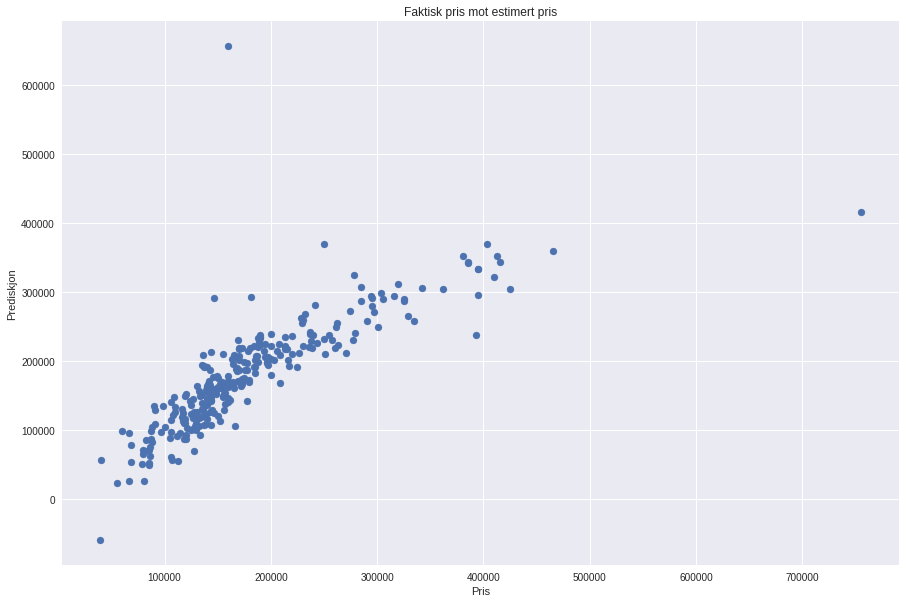

In [112]:
plt.figure(figsize=(15, 10))
plt.scatter(x=output_testdata, y=pris_prediksjoner_lineær)
plt.xlabel('Pris')
plt.ylabel('Prediskjon')
plt.title('Faktisk pris mot estimert pris')
plt.show()

## Decision tree regression

In [49]:
from sklearn import tree

model_tre = tree.DecisionTreeClassifier()

model_tre.fit(input_treningsdata, output_treningsdata)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [96]:
pris_prediksjon_tre = model_tre.predict(input_testdata)

MAE_tre = mean_absolute_error(pris_prediksjon_tre, output_testdata)

print("MAE: {}".format(MAE_tre))

MAE: 33068.97602739726


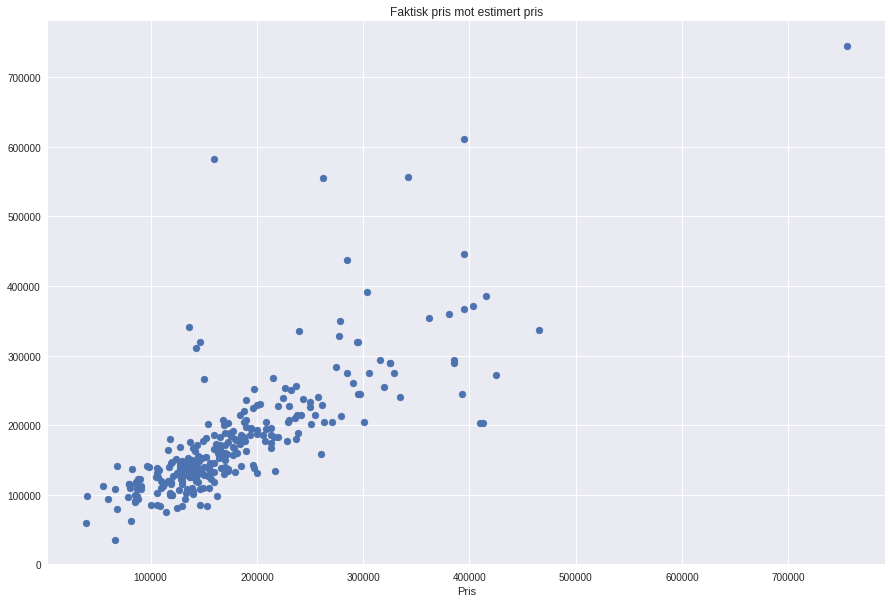

In [51]:
plt.figure(figsize=(15, 10))
plt.scatter(output_testdata, pris_prediksjon_tre)
plt.xlabel('Predkisjon')
plt.xlabel('Pris')
plt.title('Faktisk pris mot estimert pris')
plt.show()

##Skog regressjon

In [102]:
#Forest regression

from sklearn.ensemble import RandomForestRegressor

modell_skog = RandomForestRegressor(random_state=1)

modell_skog.fit(input_treningsdata, output_treningsdata)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=1, verbose=0, warm_start=False)

In [103]:
pris_prediksjon_skog = modell_forest.predict(input_testdata)

MAE_skog = mean_absolute_error(pris_prediksjon_skog, output_testdata)

print("MAE: {}".format(MAE_skog))

MAE: 19038.69417808219


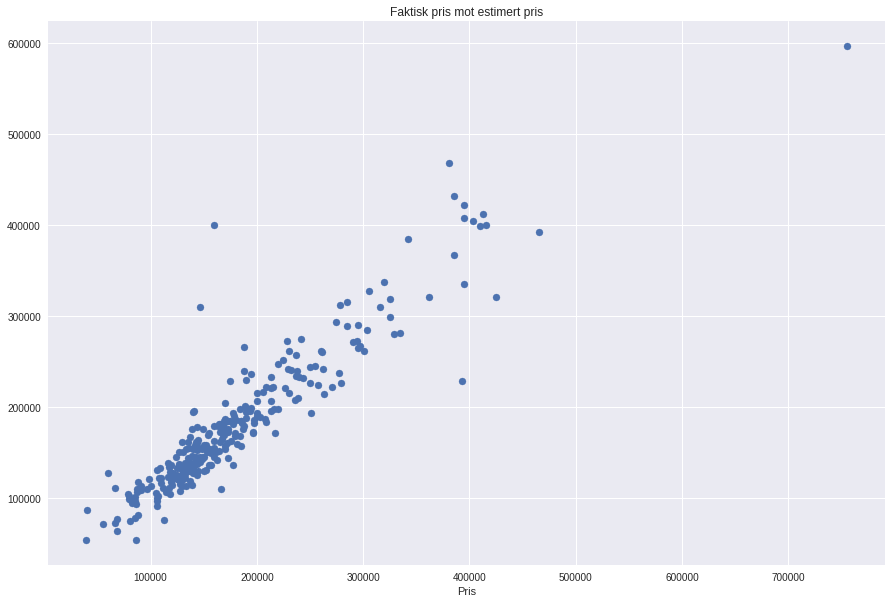

In [104]:
plt.figure(figsize=(15, 10))
plt.scatter(output_testdata, pris_prediksjon_skog)
plt.xlabel('Predkisjon')
plt.xlabel('Pris')
plt.title('Faktisk pris mot estimert pris')
plt.show()

##Nevralt nettverk regressjon

In [60]:
from sklearn.neural_network import MLPRegressor

modell_MLPR = MLPRegressor(hidden_layer_sizes=(200,), activation='relu',solver='adam', learning_rate_init=0.001, momentum = 0.9, validation_fraction = 0.1)

modell_MLPR.fit(input_treningsdata, output_treningsdata)

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(200,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [61]:
pris_prediksjon_MLPR = modell_MLPR.predict(input_testdata)

MAE_MLPR = mean_absolute_error(pris_prediksjon_MLPR, output_testdata)

print("MAE: {}".format(MAE_MLPR))

MAE: 47267.39420565581


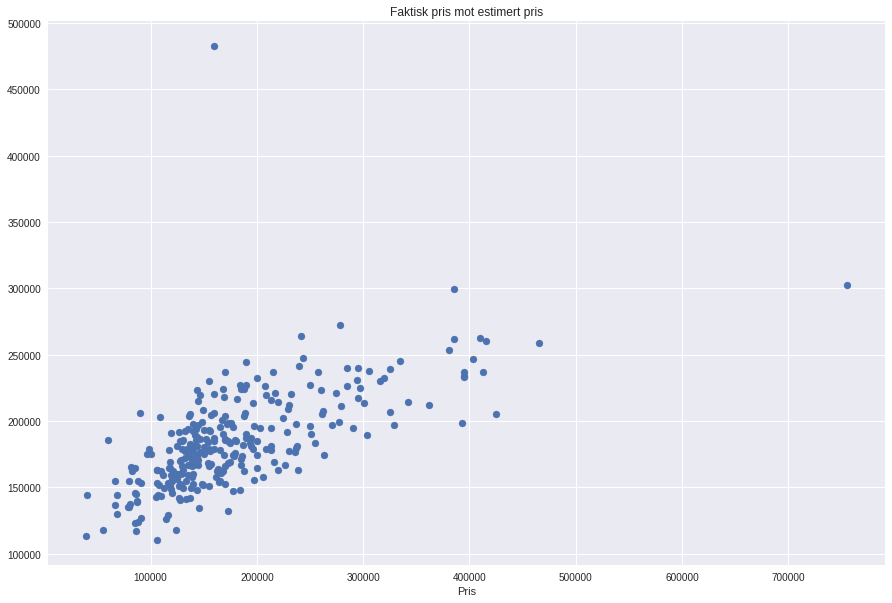

In [62]:
plt.figure(figsize=(15, 10))
plt.scatter(output_testdata, pris_prediksjon_MLPR)
plt.xlabel('Predkisjon')
plt.xlabel('Pris')
plt.title('Faktisk pris mot estimert pris')
plt.show()

# Analyse av resultater

La oss se nærmere på 10 eksempler i datasettet

##Sammenlikning av modeller

Vi kan slå sammen prediksjonene til alle modellene i en dataframe for å lettere sammenlikne outputen

In [108]:
kolonner_resultat = ['output_testdata', 'pris_prediksjoner_regressjon', 'pris_prediksjon_tre','pris_prediksjon_skog', 'pris_prediksjon_MLPR']
resultat_data = {'output_testdata':output_testdata, 'pris_prediksjoner_regressjon':pris_prediksjoner_regressjon, 'pris_prediksjon_tre':pris_prediksjon_tre, 'pris_prediksjon_skog':pris_prediksjon_skog, 'pris_prediksjon_MLPR':pris_prediksjon_MLPR}

resultat = pd.DataFrame(data=resultat_data, columns = kolonner_resultat)
resultat.head(5)

,output_testdata,pris_prediksjoner_regressjon,pris_prediksjon_tre,pris_prediksjon_skog,pris_prediksjon_MLPR
1180,250000,232324.760137,233000,226019.0,195888.492868
297,239000,218477.331748,189000,210145.0,162976.287711
598,217500,192462.510119,134450,171904.0,221157.844182
897,142953,164528.457691,122500,161190.0,173757.124725
1281,180000,218657.220923,179200,185279.0,185193.541924


In [109]:
MAE_kolonner = ['MAE_lin','MAE_tre','MAE_skog','MAE_MLPR']
MAE_alle = pd.DataFrame(data={'MAE_lin':[MAE_lin], 'MAE_tre':[MAE_tre], 'MAE_skog':[MAE_skog],'MAE_MLPR':[MAE_MLPR]},columns=MAE_kolonner)
MAE_alle.head()

,MAE_lin,MAE_tre,MAE_skog,MAE_MLPR
0,27618.791188,33068.976027,19038.694178,47267.394206


Vi kan også plott alle prediksjonspunktene til hver modell mot hverandre for å visualisere hvordan prediksjons-distribusjonen ser ut

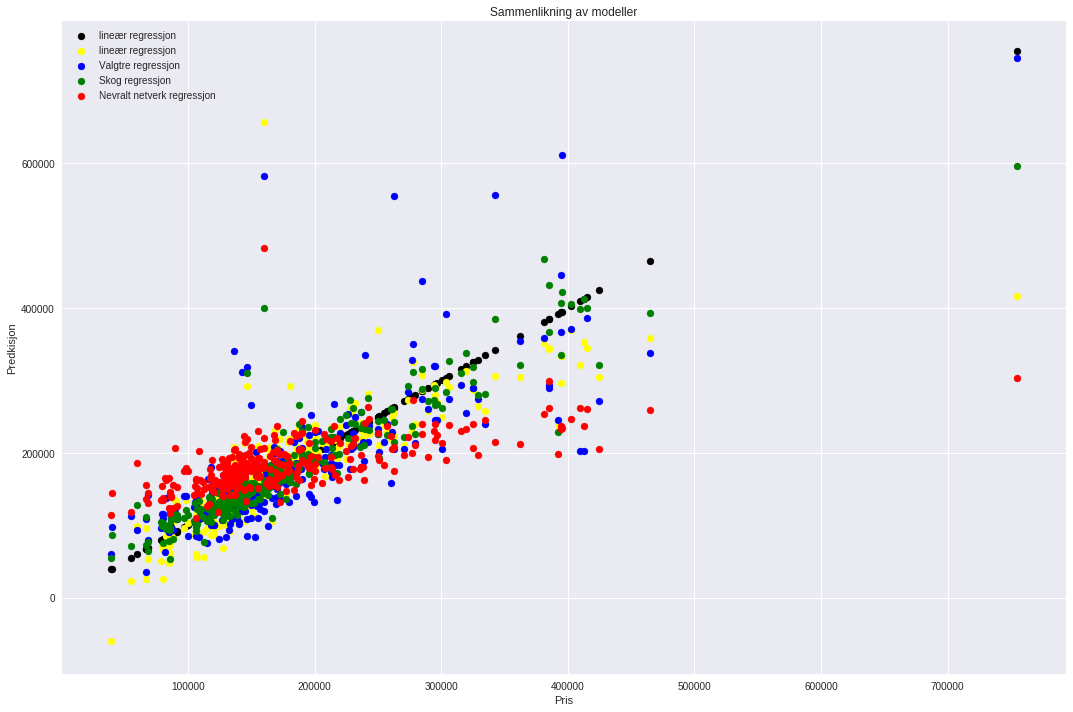

In [116]:
plt.figure(figsize=(18, 12))
plt.scatter(output_testdata, output_testdata, color='black', label='lineær regressjon')
plt.scatter(output_testdata, pris_prediksjoner_lineær, color='yellow', label='lineær regressjon')
plt.scatter(output_testdata, pris_prediksjon_tre, color='blue', label='Valgtre regressjon')
plt.scatter(output_testdata, pris_prediksjon_forest, color='green', label='Skog regressjon')
plt.scatter(output_testdata, pris_prediksjon_MLPR, color='red', label='Nevralt netverk regressjon')
plt.ylabel('Predkisjon')
plt.xlabel('Pris')
plt.title('Sammenlikning av modeller')
plt.legend(loc='upper left')
plt.show()

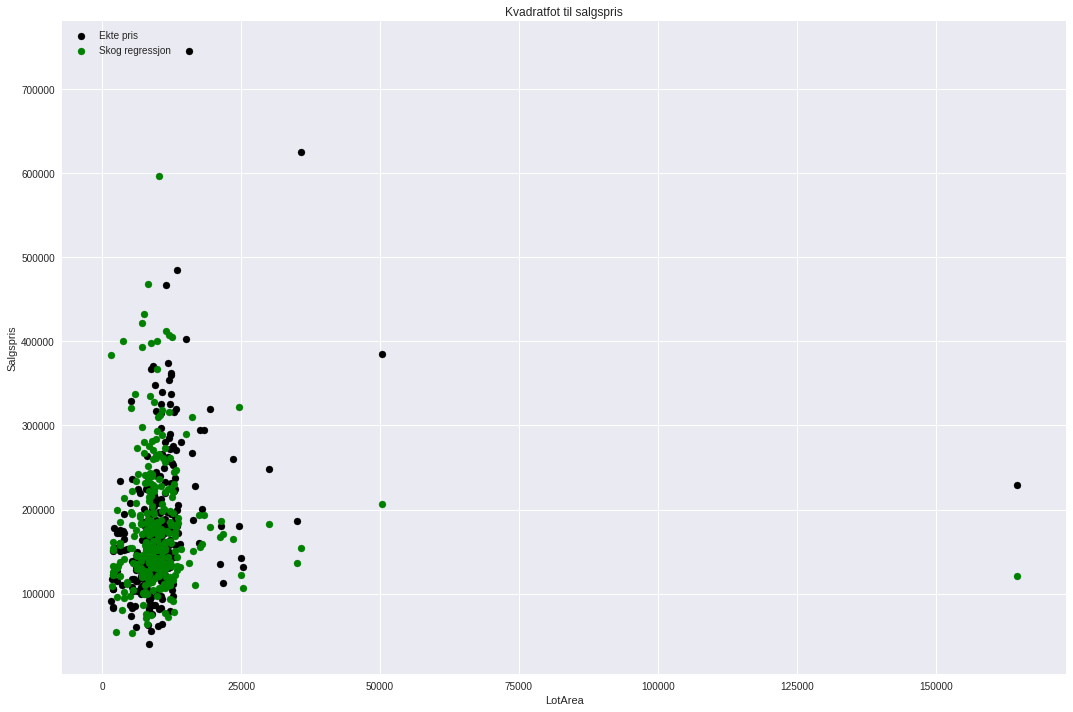

In [135]:
plt.figure(figsize=(18, 12))
plt.scatter(input_testdata['LotArea'], output_testdata, color='black', label='Ekte pris')
plt.scatter(input_testdata['LotArea'], pris_prediksjon_skog, color='green', label='Skog regressjon')
plt.ylabel('Salgspris')
plt.xlabel('LotArea')
plt.title('Kvadratfot til salgspris')
plt.legend(loc='upper left')
plt.show()

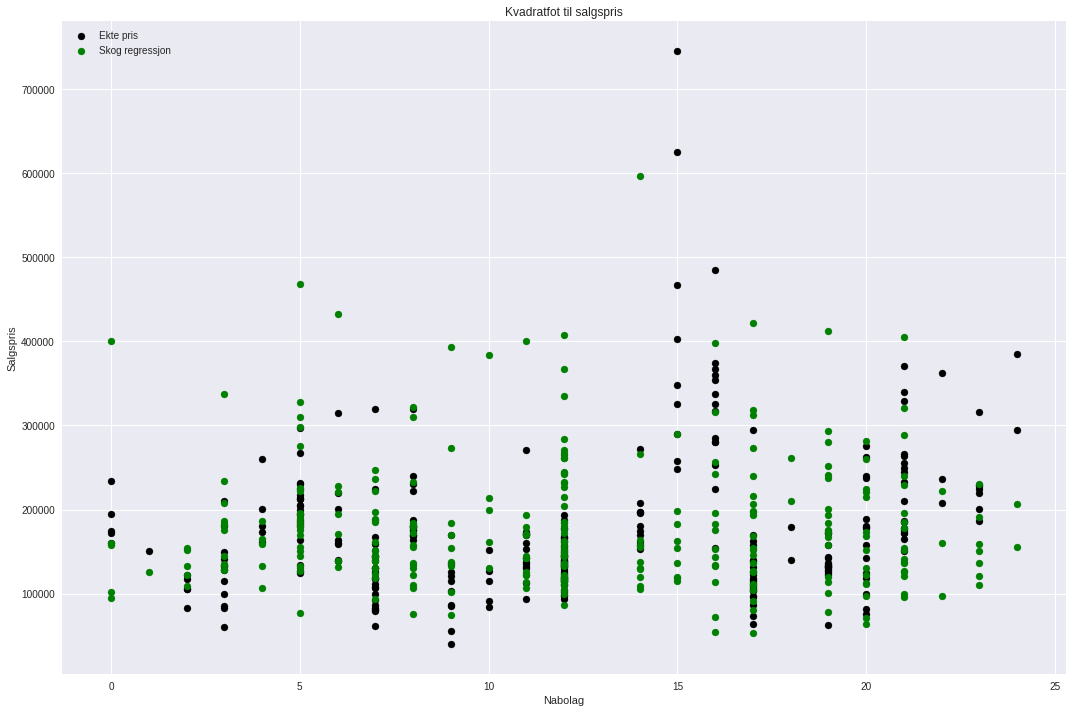

In [136]:
plt.figure(figsize=(18, 12))
plt.scatter(input_testdata['Neighborhood'], output_testdata, color='black', label='Ekte pris')
plt.scatter(input_testdata['Neighborhood'], pris_prediksjon_skog, color='green', label='Skog regressjon')
plt.ylabel('Salgspris')
plt.xlabel('Nabolag')
plt.title('Kvadratfot til salgspris')
plt.legend(loc='upper left')
plt.show()

##Oppgave: Bygg model

Bygg din egen modell på datasettet du lagde i tidligere seksjon. Juster parametrene til modellen og forsøk å få så lav MAE som mulig. Bruk gjerne andre regressjonsmetoder i scikit-learn biblioteket:

http://scikit-learn.org/stable/supervised_learning.html

Bruk gjerne modellene som allerede er satt opp og juster parameterene for å forbedre modellen. Se hvor lav MAE du kan få.